In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mental_health_survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df = df.fillna({'self_employed': 'Not specified', 'work_interfere': 'Not sure'})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [9]:
df = df.fillna({'self_employed': 'Not specified', 'work_interfere': 'Not sure'})

In [10]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,United States,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No


In [11]:
# Let's choose 6 simple, meaningful features
selected_features = [
    'Age',
    'Gender',
    'self_employed',
    'family_history',
    'work_interfere',
    'benefits'
]

# Create a copy of selected features + target
data = df[selected_features + ['treatment']].copy()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
encoder = LabelEncoder()

# Encode each column with text data
for col in ['Gender', 'self_employed', 'family_history', 'work_interfere', 'benefits', 'treatment']:
    data[col] = encoder.fit_transform(data[col].astype(str))


In [ ]:
'''This changes:
"Yes" → 1
"No" → 0
"Sometimes" → a number, etc.'''

In [14]:
from sklearn.model_selection import train_test_split

X = data[selected_features]
y = data['treatment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42  26]
 [ 24 104]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        68
           1       0.80      0.81      0.81       128

    accuracy                           0.74       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.74      0.74      0.74       196



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),    
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n📌 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



📌 Logistic Regression Results:
Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        68
           1       0.80      0.90      0.85       128

    accuracy                           0.79       196
   macro avg       0.77      0.74      0.75       196
weighted avg       0.78      0.79      0.78       196



In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Define the individual models
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()

# 2. Create the voting classifier (soft voting = probabilities)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf)],
    voting='soft'  # use 'soft' to average probabilities
)

# 3. Fit the model
voting_clf.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = voting_clf.predict(X_test)

print("📌 Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


📌 Voting Classifier Results:
Accuracy: 0.7908163265306123
[[ 41  27]
 [ 14 114]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        68
           1       0.81      0.89      0.85       128

    accuracy                           0.79       196
   macro avg       0.78      0.75      0.76       196
weighted avg       0.79      0.79      0.78       196



/var/folders/k7/l6ytr9kx3ws1qlv7xs9kgr740000gn/T/ipykernel_3617/2497895240.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


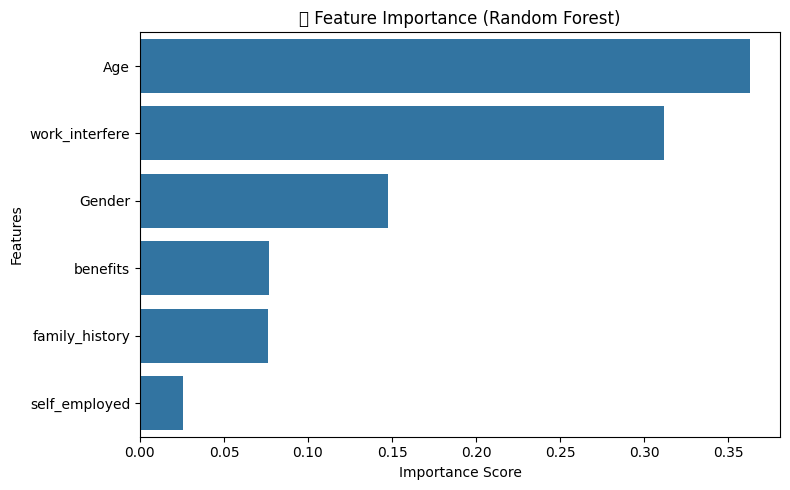

In [23]:
# Fit the Random Forest model (again, individually)
rf_clf.fit(X_train, y_train)

# Feature importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importance = rf_clf.feature_importances_
features = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('🔍 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()




In [24]:
pip install streamlit



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import joblib

# Save the model
joblib.dump(voting_clf, 'mental_health_model.pkl')


['mental_health_model.pkl']